# Project: Communicate Data Findings

       

### 1) Introduction 


This project is divided into two major parts. In the first part, you will conduct an exploratory data analysis on a dataset of your choosing. I  use Python data science and data visualization libraries to explore the dataset’s variables and understand the data’s structure, oddities, patterns and relationships. The analysis in this part should be structured, going from simple univariate relationships up through multivariate relationships, but it does not need to be clean or perfect. There is no one single answer that needs to come out of a given dataset.  

Explore your data and document your findings in a report. The report should briefly introduce the dataset, then systematically walk through the points of exploration that you conducted. You should have headers and text that organize your thoughts and findings. Visualizations in this part of the project need not be completely polished: this is just your own exploration at this point.

The proejct aims to answer below questions: 
- What are the regions of bike riding?
- Who are the customers?
- How many riders have completed their ride ?
- Which place has the longest ride distance ?
- Which station takes longer travel time?
- Which station has the max distance travled and on which day ?

### 2) Data assessing 


In [114]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime
import math
import matplotlib as mp
import geopy.distance
from sklearn.cluster import KMeans


In [115]:
df=pd.read_csv('202005-baywheels-tripdata1.csv') 
df.head(10)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,is_equity
0,BA4B4D93677877E8,electric_bike,2020-05-18 22:16:06,2020-05-18 22:28:20,NaN,NaN,NaN,NaN,37.3443,-121.9218,37.3443,-121.9217,casual,False
1,92634E825C7303CC,electric_bike,2020-05-19 16:57:35,2020-05-19 17:29:56,NaN,NaN,NaN,NaN,37.7286,-122.4921,37.7154,-122.4854,casual,False
2,1FCDD14C62521CC1,electric_bike,2020-05-18 20:08:14,2020-05-18 20:14:25,NaN,NaN,Webster St at Clay St,492.0,37.7919,-122.4174,37.7906,-122.4325,casual,False
3,3A5CEC684CA9FA18,electric_bike,2020-05-19 14:05:08,2020-05-19 14:14:16,NaN,NaN,NaN,NaN,37.7557,-122.4165,37.7681,-122.4266,casual,False
4,1FF95A9C2D1ED7F8,electric_bike,2020-05-10 17:45:54,2020-05-10 18:29:29,Pier 1/2 at The Embarcadero,12.0,NaN,NaN,37.7964,-122.3946,37.7780,-122.4144,casual,False
5,E0937CAFF4D56EC0,electric_bike,2020-05-11 08:45:24,2020-05-11 08:52:55,NaN,NaN,NaN,NaN,37.7856,-122.4134,37.7894,-122.4156,casual,False
6,82AB84FFF9D4A01E,electric_bike,2020-05-11 00:12:32,2020-05-11 00:22:25,NaN,NaN,NaN,NaN,37.7783,-122.4143,37.7781,-122.4142,casual,False
7,87AB71D10C30CBBA,electric_bike,2020-05-10 23:58:34,2020-05-11 00:00:44,NaN,NaN,NaN,NaN,37.7285,-122.3847,37.7294,-122.3866,casual,False
8,574118AD595764A4,electric_bike,2020-05-11 15:28:48,2020-05-11 15:55:37,Willow St at Blewett Ave,473.0,Palm St at Willow St,300.0,37.3090,-121.9000,37.3172,-121.8849,casual,False
9,6B81C2AF414B8AD3,electric_bike,2020-05-11 23:01:05,2020-05-11 23:44:36,NaN,NaN,NaN,NaN,37.7786,-122.3911,37.7968,-122.4225,casual,False


In [116]:
df_original= df.copy()

In [117]:
df.shape

(138251, 14)

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138251 entries, 0 to 138250
Data columns (total 14 columns):
ride_id               138251 non-null object
rideable_type         138251 non-null object
started_at            138251 non-null object
ended_at              138251 non-null object
start_station_name    87315 non-null object
start_station_id      87315 non-null float64
end_station_name      84779 non-null object
end_station_id        84779 non-null float64
start_lat             138251 non-null float64
start_lng             138251 non-null float64
end_lat               138027 non-null float64
end_lng               138027 non-null float64
member_casual         138251 non-null object
is_equity             138251 non-null bool
dtypes: bool(1), float64(6), object(7)
memory usage: 13.8+ MB


In [119]:
df.isnull().sum()

ride_id                   0
rideable_type             0
started_at                0
ended_at                  0
start_station_name    50936
start_station_id      50936
end_station_name      53472
end_station_id        53472
start_lat                 0
start_lng                 0
end_lat                 224
end_lng                 224
member_casual             0
is_equity                 0
dtype: int64

In [120]:
df=df.dropna()

In [121]:
df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])

In [122]:
df['start_station_id'] = df['start_station_id'].astype('str')

In [123]:
df['end_station_id'] = df['end_station_id'].astype('str')

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70895 entries, 8 to 138246
Data columns (total 14 columns):
ride_id               70895 non-null object
rideable_type         70895 non-null object
started_at            70895 non-null datetime64[ns]
ended_at              70895 non-null datetime64[ns]
start_station_name    70895 non-null object
start_station_id      70895 non-null object
end_station_name      70895 non-null object
end_station_id        70895 non-null object
start_lat             70895 non-null float64
start_lng             70895 non-null float64
end_lat               70895 non-null float64
end_lng               70895 non-null float64
member_casual         70895 non-null object
is_equity             70895 non-null bool
dtypes: bool(1), datetime64[ns](2), float64(4), object(7)
memory usage: 7.6+ MB


In [125]:
df.shape

(70895, 14)

In [126]:
start_lat_count=df.start_lat.value_counts()
start_lat_count

37.7720    1091
37.7873     957
37.7766     944
37.7735     816
37.7954     684
           ... 
37.8049       1
37.7442       1
37.7998       1
37.7709       1
37.7500       1
Name: start_lat, Length: 719, dtype: int64

Most frequently used lattitude for starting station is 37.7720

In [127]:
df.start_lng.value_counts()


-122.4537    766
-122.3948    720
-122.4219    697
-122.4266    633
-122.3946    626
            ... 
-122.4930      1
-121.9118      1
-121.8764      1
-122.3864      1
-121.8950      1
Name: start_lng, Length: 815, dtype: int64

Most frequently used longitude for starting station is -122.4537

In [128]:
df.end_lat.value_counts()

37.7766    1097
37.7720    1058
37.7614     782
37.7954     717
37.7873     700
           ... 
37.7268       1
37.3316       1
37.7587       1
37.3372       1
37.8085       1
Name: end_lat, Length: 856, dtype: int64

Most frequently used lattitude for starting station is 37.7766

In [129]:
 df.end_lng.value_counts() 


-122.4537    786
-122.4219    778
-122.4335    735
-122.5091    710
-122.3948    665
            ... 
-122.4656      1
-122.4683      1
-122.4431      1
-122.4151      1
-122.4549      1
Name: end_lng, Length: 981, dtype: int64

Most frequently used longitude for starting station is -122.4537

## Question

In [130]:
df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'is_equity'],
      dtype='object')

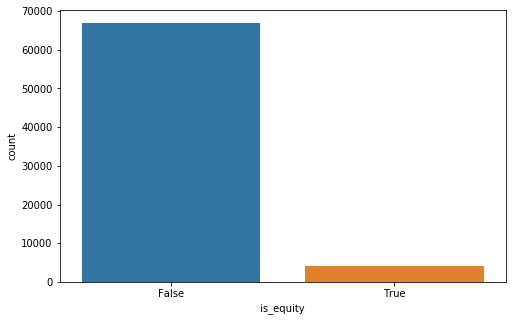

In [131]:
plt.figure(figsize=(8,5))
sns.countplot(x=df.is_equity)
plt.show()

#### Q. What are the regions of bike riding?

Now checking wheather latitudes and longitudes are related to each other or not

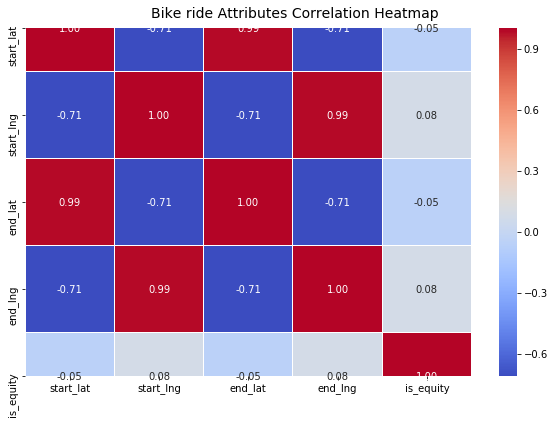

In [66]:
f, ax = plt.subplots(figsize=(10,6))
corr = df.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Bike ride Attributes Correlation Heatmap', fontsize=14)

Now we can clearly spot the correaltion amongst attribute .

After this we plot the most correlated attribute to get the actual visualisation 

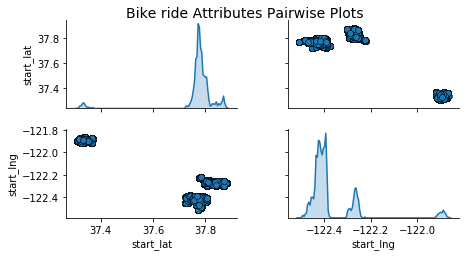

In [67]:
# Pair-wise Scatter Plots
cols = ['start_lat','start_lng']
pp = sns.pairplot(df[cols], height=1.8, aspect=1.8,
                  plot_kws=dict(edgecolor="k", linewidth=0.5),
                  diag_kind="kde", diag_kws=dict(shade=True))

fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Bike ride Attributes Pairwise Plots', fontsize=14)

As we can see that there are total of 3 clusters .

Now i will try to plot the cluster in geomap to get the exact location of the clusters 

In [68]:
#https://wiki.openstreetmap.org/wiki/Bounding_Box 
BBox = ((df.start_lng.min(),   df.start_lng.max(),      
         df.start_lat.min(), df.start_lat.max()))
BBox

(-122.5091, -121.8637, 37.309, 37.8802)

In [69]:
#https://www.openstreetmap.org/export#map=9/37.6023/-122.0609

ruh_m = plt.imread('C:/Users/SHIWALI SINGH/Desktop/LDRchecking/Projects/Communicate your findings/map.png')

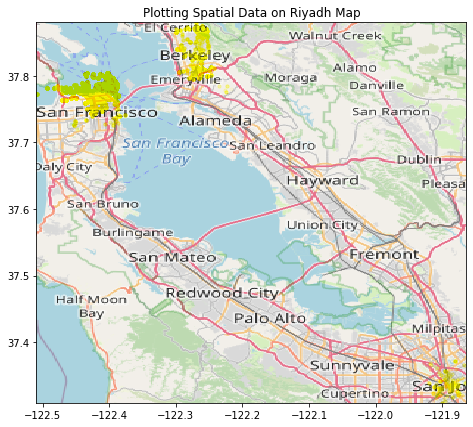

In [70]:
fig, ax = plt.subplots(figsize = (10,7))
ax.scatter(df.start_lng, df.start_lat, zorder=1, alpha= 0.01, c='yellow', s=10)
ax.set_title('Plotting Spatial Data on Riyadh Map')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal');

So from map plotting we can see that max number of people start riding bike is from san jose , san francisco emeryville and berkeley

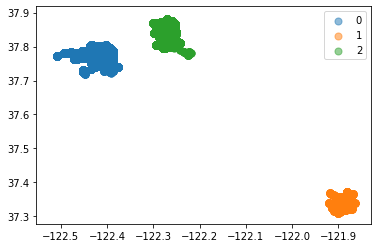

In [71]:
#assing labels to clusters 
kmeans = KMeans(n_clusters=3).fit(df[["start_lng", "start_lat"]])

df["label"] = kmeans.labels_

for x in set(list(df.label)):
    
    df_plot_cluster = df.query(f"label == {x}")

    plt.scatter(df_plot_cluster['start_lng'], df_plot_cluster["start_lat"], s=50, alpha=0.5, label = x);

plt.legend();

In [72]:
mapping = {0: "San Francisco", 1: "San José", 2: "Emeryville"}

In [73]:
df["label_name"] = df["label"].map(mapping)

In [74]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,is_equity,label,label_name
8,574118AD595764A4,electric_bike,2020-05-11 15:28:48,2020-05-11 15:55:37,Willow St at Blewett Ave,473.0,Palm St at Willow St,300.0,37.3090,-121.9000,37.3172,-121.8849,casual,False,1,San José
10,99701B4330290FD4,electric_bike,2020-05-12 13:44:42,2020-05-12 13:56:21,Montgomery St BART Station (Market St at 2nd St),21.0,Mission Bay Kids Park,92.0,37.7905,-122.4015,37.7754,-122.3928,casual,False,0,San Francisco
18,FE44A098F0CD2744,electric_bike,2020-05-29 07:46:05,2020-05-29 08:03:47,Market St at 10th St,58.0,17th Ave at Geary Blvd,477.0,37.7769,-122.4174,37.7807,-122.4761,casual,False,0,San Francisco
27,B0084A48F485A95E,electric_bike,2020-05-29 13:47:04,2020-05-29 14:03:50,Hyde St at Post St,369.0,Laurel St at California St,514.0,37.7876,-122.4166,37.7868,-122.4500,casual,False,0,San Francisco
28,DFE3D06841F5C565,electric_bike,2020-05-29 09:55:45,2020-05-29 10:19:40,McAllister St at Arguello Blvd,455.0,Arguello Blvd at Geary Blvd,456.0,37.7753,-122.4580,37.7815,-122.4587,casual,False,0,San Francisco


After plotting longitudinal and latitudinal values of starting location we will plot longitudinal and latitudinal values ending location  

So from map plotting we can see that max number of people end riding bike is from somewhere far from milpitas , san francisco emeryville and berkeley


#### Q. How many riders have completed their ride ?

Now calculating the distance between stating and ending point 

In [75]:
#https://gist.github.com/rochacbruno/2883505

def distance(s_lat, s_lng, e_lat, e_lng):
    
    # approximate radius of earth in km
    R = 6373.0
    
    s_lat = s_lat*np.pi/180.0                      
    s_lng = np.deg2rad(s_lng)     
    e_lat = np.deg2rad(e_lat)                       
    e_lng = np.deg2rad(e_lng)  
    
    d = np.sin((e_lat - s_lat)/2)**2 + np.cos(s_lat)*np.cos(e_lat) * np.sin((e_lng - s_lng)/2)**2
    
    return 2 * R * np.arcsin(np.sqrt(d))

In [76]:
df['distance_from_start_end'] = df.apply(lambda x: distance(x['start_lat'], x['start_lng'], x['end_lat'], x['end_lng']), axis=1)
df.head(1)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,is_equity,label,label_name,distance_from_start_end
8,574118AD595764A4,electric_bike,2020-05-11 15:28:48,2020-05-11 15:55:37,Willow St at Blewett Ave,473.0,Palm St at Willow St,300.0,37.309,-121.9,37.3172,-121.8849,casual,False,1,San José,1.617503


In [77]:
df.query("distance_from_start_end == 0.0 ")

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,is_equity,label,label_name,distance_from_start_end
129,70EC84966555BEE8,electric_bike,2020-05-15 13:44:23,2020-05-15 14:30:13,Steiner St at California St,480.0,Steiner St at California St,480.0,37.7885,-122.4354,37.7885,-122.4354,casual,False,0,San Francisco,0.0
237,BAE62E0740DAD2CB,electric_bike,2020-05-09 17:24:14,2020-05-09 18:09:49,Mission Dolores Park,120.0,Mission Dolores Park,120.0,37.7614,-122.4266,37.7614,-122.4266,casual,False,0,San Francisco,0.0
301,18D719993F78CE61,electric_bike,2020-05-02 14:03:42,2020-05-02 15:21:54,10th Ave at Irving St,451.0,10th Ave at Irving St,451.0,37.7642,-122.4674,37.7642,-122.4674,casual,False,0,San Francisco,0.0
318,225F66780E51DEB1,electric_bike,2020-05-02 12:55:48,2020-05-02 13:48:31,McAllister St at Arguello Blvd,455.0,McAllister St at Arguello Blvd,455.0,37.7753,-122.4581,37.7753,-122.4581,casual,False,0,San Francisco,0.0
364,14DFBDF5E459E857,electric_bike,2020-05-20 23:58:13,2020-05-20 23:58:46,Grove St at Gough St,468.0,Grove St at Gough St,468.0,37.7779,-122.4228,37.7779,-122.4228,casual,False,0,San Francisco,0.0
422,4513BBCEFCE5FBFA,electric_bike,2020-05-29 14:09:58,2020-05-29 16:11:02,Scott St at Golden Gate Ave,39.0,Scott St at Golden Gate Ave,39.0,37.7791,-122.4370,37.7791,-122.4370,casual,False,0,San Francisco,0.0
678,FE66D3BEA15F0503,electric_bike,2020-05-21 18:19:43,2020-05-21 18:19:46,McAllister St at Baker St,52.0,McAllister St at Baker St,52.0,37.7774,-122.4420,37.7774,-122.4420,casual,False,0,San Francisco,0.0
755,C8AAB5403C2D9186,electric_bike,2020-05-23 11:42:50,2020-05-23 12:59:56,Frederick St at Arguello Blvd,458.0,Frederick St at Arguello Blvd,458.0,37.7658,-122.4575,37.7658,-122.4575,casual,False,0,San Francisco,0.0
786,953806E84BF8C6C9,electric_bike,2020-05-05 14:56:39,2020-05-05 15:26:16,Powell St at Columbus Ave,487.0,Powell St at Columbus Ave,487.0,37.8004,-122.4108,37.8004,-122.4108,casual,False,0,San Francisco,0.0
821,17C1EAA1BE5D9BD8,electric_bike,2020-05-13 09:58:35,2020-05-13 10:32:02,Market St at Dolores St,86.0,Market St at Dolores St,86.0,37.7692,-122.4270,37.7692,-122.4270,casual,False,0,San Francisco,0.0


In [78]:
df.query("distance_from_start_end == 0.0 ")['ride_id'].count()

8241

In [79]:
df['distance_from_start_end'].max() , df['distance_from_start_end'].min()

(17.513943180699723, 0.0)

In [80]:
df.query("distance_from_start_end == 0.0 ")['ride_id'].count()/df.shape[0]*100

11.624233020664363

We can clearly see that more than 9% of registered riders have not completed their Rides

In [81]:
distance_count=df['distance_from_start_end'].value_counts().iloc[:10]

In [82]:
df.shape

(70895, 17)

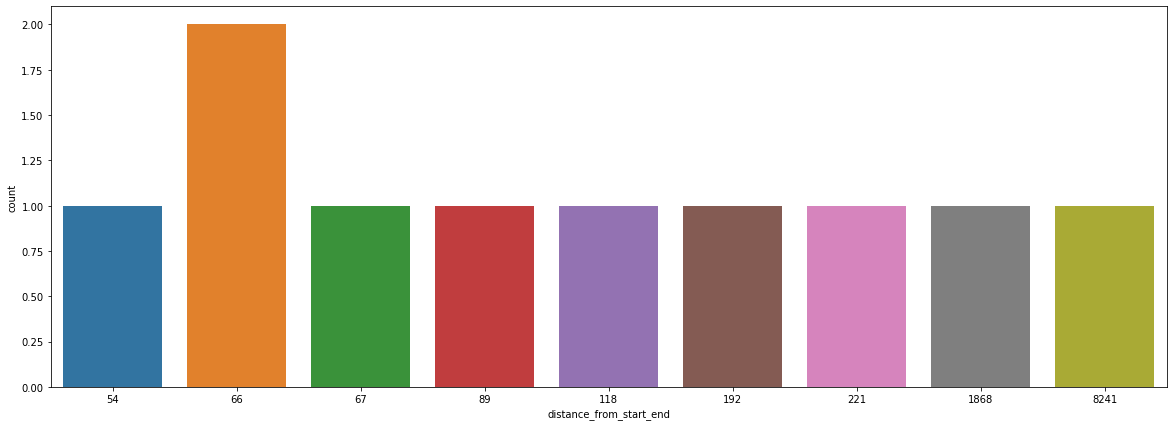

In [83]:
plt.figure(figsize=(20,7))
sns.countplot(x=distance_count)
plt.show()

We can clearly see from graph that most people have stated but not completed their ride 


#### Q. Which place has the longest ride timeing ?


In [84]:
df_1=df.query("label_name == 'San Francisco'")['distance_from_start_end']
df_1

10        1.845505
18        5.177834
27        2.937343
28        0.692365
29        3.967055
            ...   
138233    2.602894
138236    1.814439
138240    1.327782
138243    1.276799
138246    4.002385
Name: distance_from_start_end, Length: 56297, dtype: float64

In [85]:
df_2=df.query("label_name == 'San José'")['distance_from_start_end']
df_3=df.query("label_name == 'Emeryville'")['distance_from_start_end']


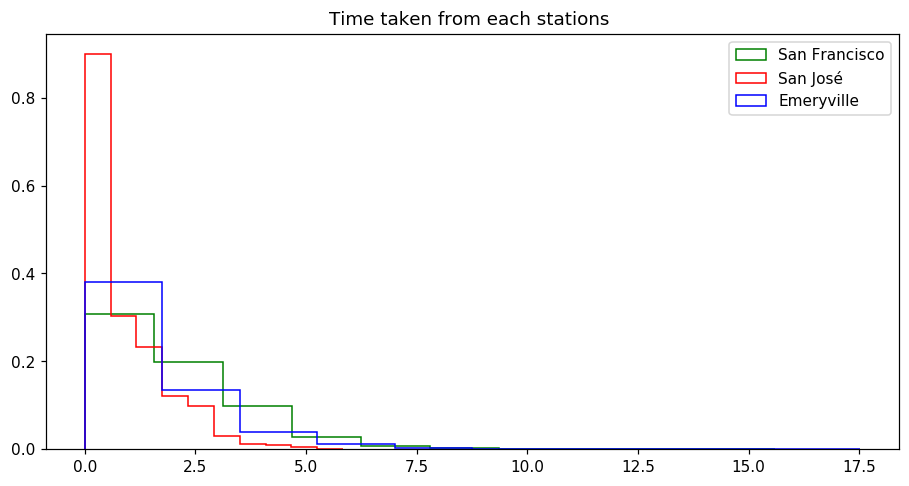

In [86]:
 num_bins=10
fig, axes = plt.subplots(figsize = (10,5), dpi = 110)

n,x,_ = plt.hist(df_1, num_bins, density=1, histtype=u'step',color='g', label='San Francisco')
n,x,_ = plt.hist(df_2, num_bins, density=1, histtype=u'step',color='r', label='San José')
n,x,_ = plt.hist(df_3, num_bins, density=1, histtype=u'step',color='b', label='Emeryville')
plt.title('Time taken from each stations ')
plt.legend(loc=0)
plt.show()

We can clealy see that rides from san jose travel longer than other two.


Indivisual analysis of all the areas

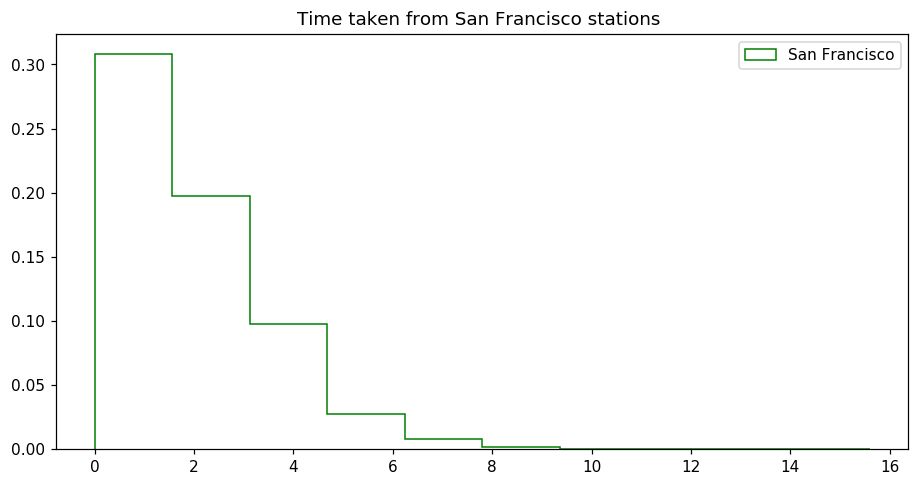

In [87]:
 num_bins=10
fig, axes = plt.subplots(figsize = (10,5), dpi = 110)

n,x,_ = plt.hist(df_1, num_bins, density=1, histtype=u'step',color='g', label='San Francisco')

plt.title('Time taken from San Francisco stations ')
plt.legend(loc=0)
plt.show()

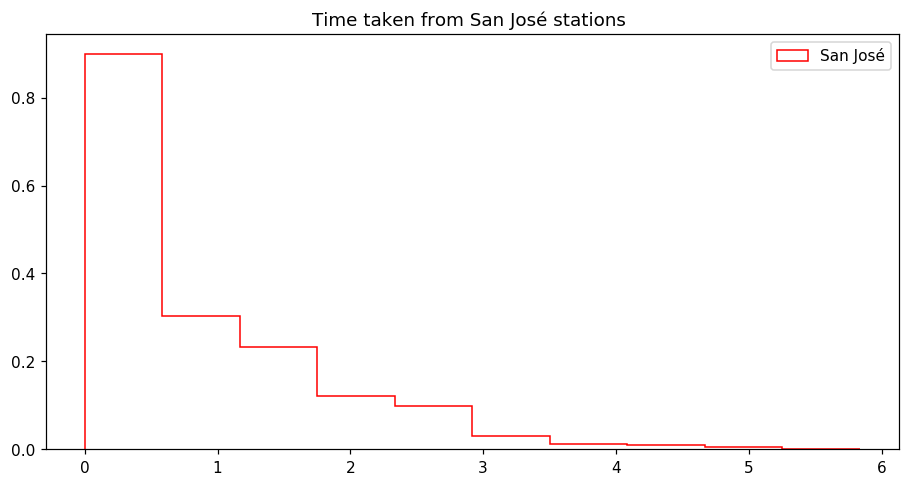

In [88]:
 num_bins=10
fig, axes = plt.subplots(figsize = (10,5), dpi = 110)

n,x,_ = plt.hist(df_2, num_bins, density=1, histtype=u'step',color='r', label='San José')
plt.title('Time taken from San José stations ')
plt.legend(loc=0)
plt.show()

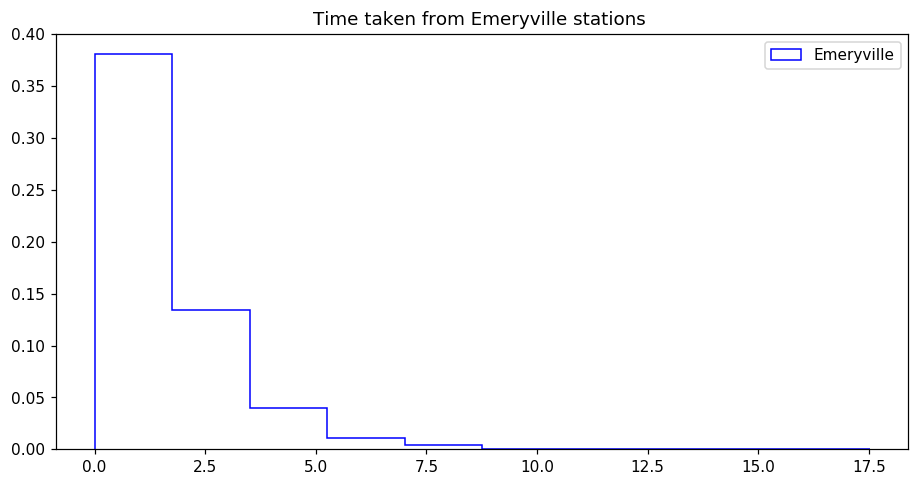

In [89]:
 num_bins=10
fig, axes = plt.subplots(figsize = (10,5), dpi = 110)


n,x,_ = plt.hist(df_3, num_bins, density=1, histtype=u'step',color='b', label='Emeryville')
plt.title('Time taken from Emeryville stations ')
plt.legend(loc=0)
plt.show()

In [90]:
df_not_comp=df.query("distance_from_start_end == 0.0")['member_casual']  
df_not_comp.value_counts()

casual    5645
member    2596
Name: member_casual, dtype: int64

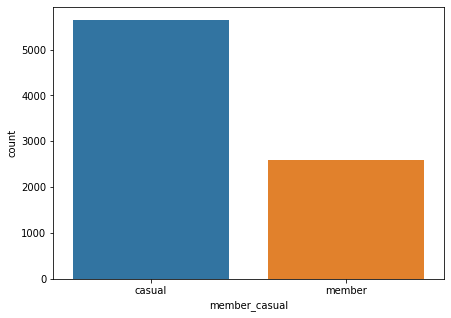

In [91]:
plt.figure(figsize=(7,5))
sns.countplot(x=df_not_comp)
plt.show()

As expected most of the user that might have droped the rides are casual members 

#### Q. Who are the customers?


In [92]:
#clean categorical data 
df.member_casual = df.member_casual.astype('category')


In [93]:
member_casual_count=df.member_casual.value_counts()
member_casual_count

casual    38009
member    32886
Name: member_casual, dtype: int64

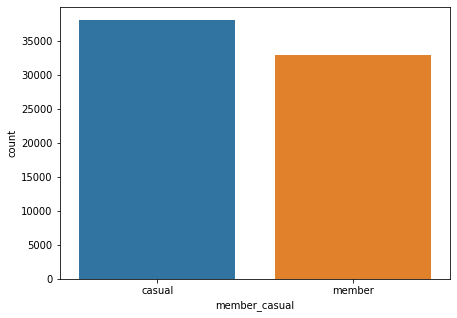

In [94]:
plt.figure(figsize=(7,5))
sns.countplot(x=df.member_casual)
plt.show()

We can clearly see that most number of registraion was  “Customer” that is Casual not “Subscriber” that is Member


#### Q. Which station takes longer travel time?

In [95]:
df.head(1)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,is_equity,label,label_name,distance_from_start_end
8,574118AD595764A4,electric_bike,2020-05-11 15:28:48,2020-05-11 15:55:37,Willow St at Blewett Ave,473.0,Palm St at Willow St,300.0,37.309,-121.9,37.3172,-121.8849,casual,False,1,San José,1.617503


In [96]:
df['duration']= df['ended_at']-df['started_at'] 


In [97]:
df['mins']=df.duration.dt.total_seconds()/60


In [98]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,is_equity,label,label_name,distance_from_start_end,duration,mins
8,574118AD595764A4,electric_bike,2020-05-11 15:28:48,2020-05-11 15:55:37,Willow St at Blewett Ave,473.0,Palm St at Willow St,300.0,37.3090,-121.9000,37.3172,-121.8849,casual,False,1,San José,1.617503,00:26:49,26.816667
10,99701B4330290FD4,electric_bike,2020-05-12 13:44:42,2020-05-12 13:56:21,Montgomery St BART Station (Market St at 2nd St),21.0,Mission Bay Kids Park,92.0,37.7905,-122.4015,37.7754,-122.3928,casual,False,0,San Francisco,1.845505,00:11:39,11.650000
18,FE44A098F0CD2744,electric_bike,2020-05-29 07:46:05,2020-05-29 08:03:47,Market St at 10th St,58.0,17th Ave at Geary Blvd,477.0,37.7769,-122.4174,37.7807,-122.4761,casual,False,0,San Francisco,5.177834,00:17:42,17.700000
27,B0084A48F485A95E,electric_bike,2020-05-29 13:47:04,2020-05-29 14:03:50,Hyde St at Post St,369.0,Laurel St at California St,514.0,37.7876,-122.4166,37.7868,-122.4500,casual,False,0,San Francisco,2.937343,00:16:46,16.766667
28,DFE3D06841F5C565,electric_bike,2020-05-29 09:55:45,2020-05-29 10:19:40,McAllister St at Arguello Blvd,455.0,Arguello Blvd at Geary Blvd,456.0,37.7753,-122.4580,37.7815,-122.4587,casual,False,0,San Francisco,0.692365,00:23:55,23.916667


In [99]:
df_4=df.query("label_name == 'San Francisco'")['mins']
df_5=df.query("label_name == 'San José'")['mins']
df_6=df.query("label_name == 'Emeryville'")['mins']


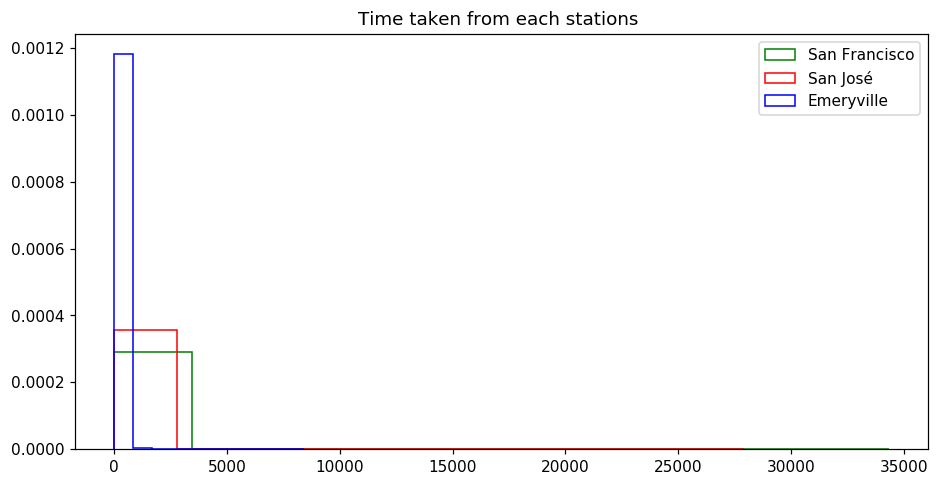

In [100]:
num_bins=10
fig, axes = plt.subplots(figsize = (10,5), dpi = 110)

n,x,_ = plt.hist(df_4, num_bins, density=1, histtype=u'step',color='g', label='San Francisco')
n,x,_ = plt.hist(df_5, num_bins, density=1, histtype=u'step',color='r', label='San José')
n,x,_ = plt.hist(df_6, num_bins, density=1, histtype=u'step',color='b', label='Emeryville')
plt.title('Time taken from each stations ')
plt.legend(loc=0)
plt.show()

Most time taken by the rides from San Francisco


#### Q. Which station has the max distance travled and on which day

In [101]:
df['weekday_name']= df.started_at.dt.weekday_name

In [102]:
df['hour']= df.started_at.dt.hour
df['minute']= df.started_at.dt.minute
df['seconds']= df.started_at.dt.second
df['day_month_year'] = pd.to_datetime(df["started_at"]).dt.to_period('D')


In [103]:
df.weekday_name = df.weekday_name.astype('category')


In [104]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,label,label_name,distance_from_start_end,duration,mins,weekday_name,hour,minute,seconds,day_month_year
8,574118AD595764A4,electric_bike,2020-05-11 15:28:48,2020-05-11 15:55:37,Willow St at Blewett Ave,473.0,Palm St at Willow St,300.0,37.3090,-121.9000,...,1,San José,1.617503,00:26:49,26.816667,Monday,15,28,48,2020-05-11
10,99701B4330290FD4,electric_bike,2020-05-12 13:44:42,2020-05-12 13:56:21,Montgomery St BART Station (Market St at 2nd St),21.0,Mission Bay Kids Park,92.0,37.7905,-122.4015,...,0,San Francisco,1.845505,00:11:39,11.650000,Tuesday,13,44,42,2020-05-12
18,FE44A098F0CD2744,electric_bike,2020-05-29 07:46:05,2020-05-29 08:03:47,Market St at 10th St,58.0,17th Ave at Geary Blvd,477.0,37.7769,-122.4174,...,0,San Francisco,5.177834,00:17:42,17.700000,Friday,7,46,5,2020-05-29
27,B0084A48F485A95E,electric_bike,2020-05-29 13:47:04,2020-05-29 14:03:50,Hyde St at Post St,369.0,Laurel St at California St,514.0,37.7876,-122.4166,...,0,San Francisco,2.937343,00:16:46,16.766667,Friday,13,47,4,2020-05-29
28,DFE3D06841F5C565,electric_bike,2020-05-29 09:55:45,2020-05-29 10:19:40,McAllister St at Arguello Blvd,455.0,Arguello Blvd at Geary Blvd,456.0,37.7753,-122.4580,...,0,San Francisco,0.692365,00:23:55,23.916667,Friday,9,55,45,2020-05-29


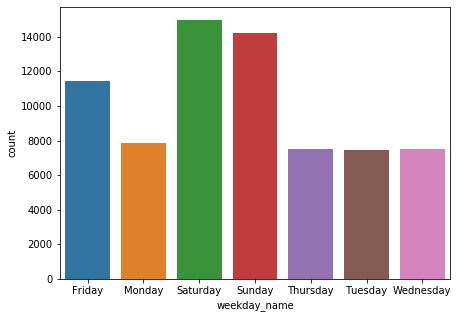

In [105]:
plt.figure(figsize=(7,5))
sns.countplot(x=df.weekday_name)
plt.show()

Most of the rides happen in weekends and not in weekdays 

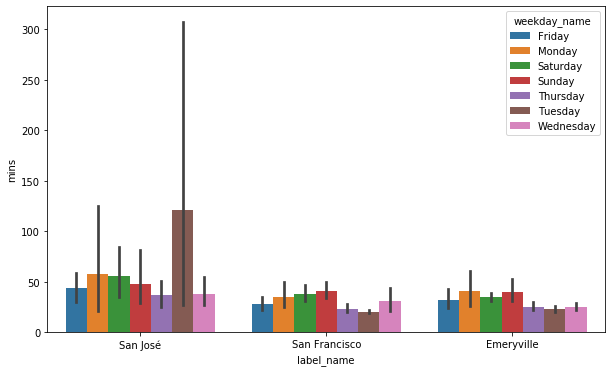

In [106]:
plt.figure(figsize=(10,6))
sns.barplot(x=df.label_name , y=df.mins ,hue=df.weekday_name)
plt.show()

From the above graph I can conclude that people traveled max distance on tuesday from san jose


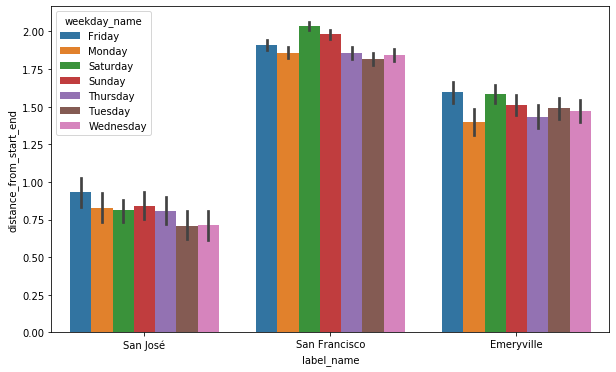

In [107]:
plt.figure(figsize=(10,6))
sns.barplot(x=df.label_name , y=df.distance_from_start_end ,hue=df.weekday_name)
plt.show()

From the obtained graph its clear that San francisco has the max distance covered troughout the week days .

Amongst week days the max distance was on saturday


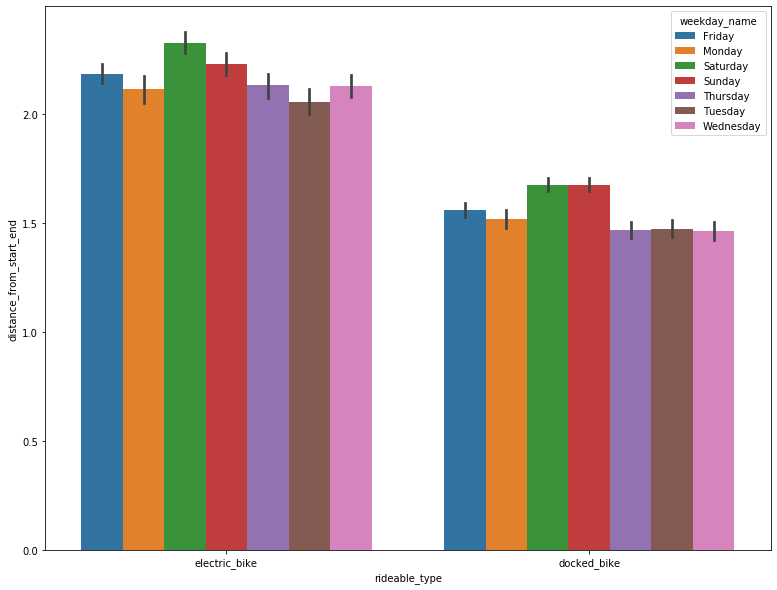

In [108]:
plt.figure(figsize=(13,10))
sns.barplot(x=df.rideable_type , y=df.distance_from_start_end ,hue=df.weekday_name)
plt.show()

People used electric bike more for longer distance as compare to docked bike 


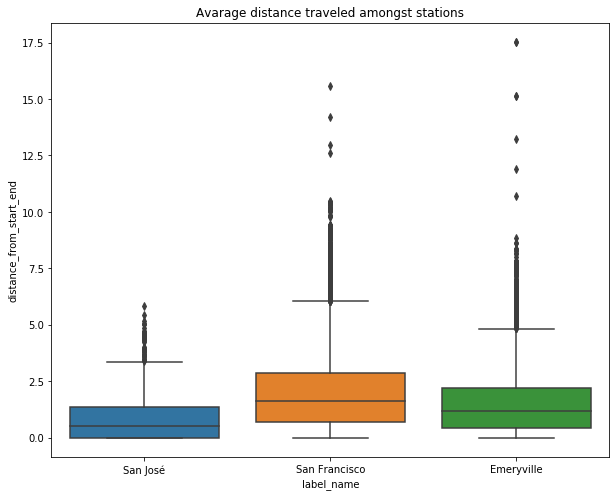

In [109]:
plt.figure(figsize=(10,8))
sns.boxplot(x= df.label_name , y= df.distance_from_start_end)
plt.title("Avarage distance traveled amongst stations");

There are few outliers in label name

The avgrage distance cover by san francisco is more than other two


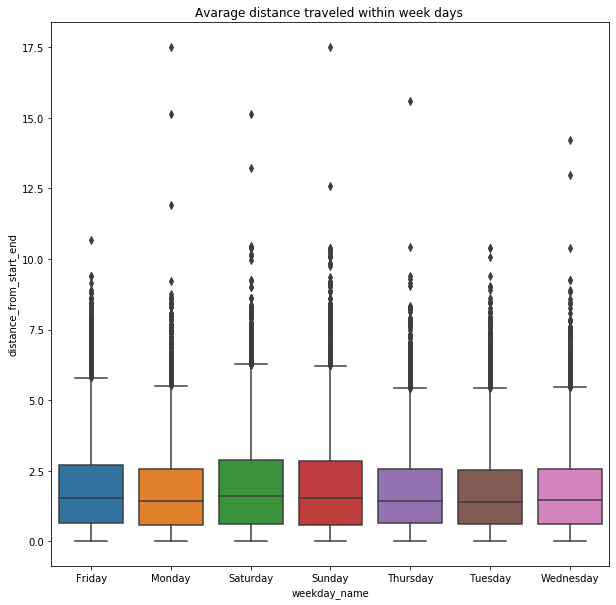

In [110]:
plt.figure(figsize=(10,10))
sns.boxplot(x= df.weekday_name , y= df.distance_from_start_end)
plt.title("Avarage distance traveled within week days ");

People cover more distance in Saturdays and sundays 

##### Week wise visualisation of all the area

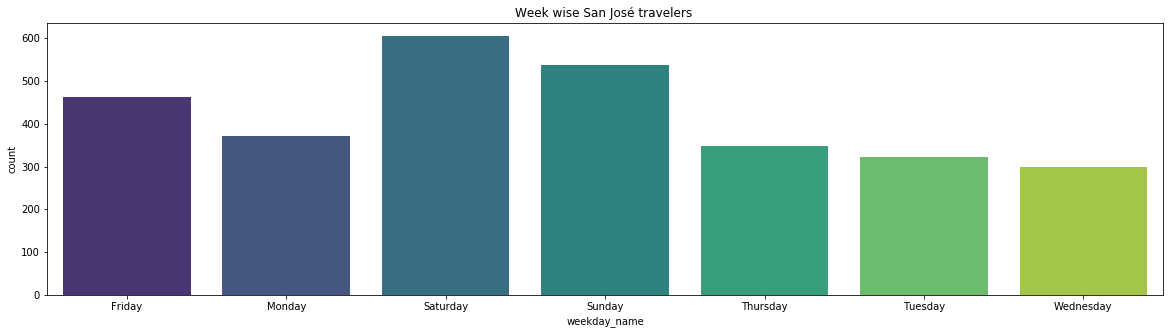

In [111]:

fig, ax = plt.subplots(figsize = (20,5))
sns.countplot(x = "weekday_name", data = df.query("label_name == 'San José'"), palette = "viridis");
plt.title("Week wise San José travelers ");

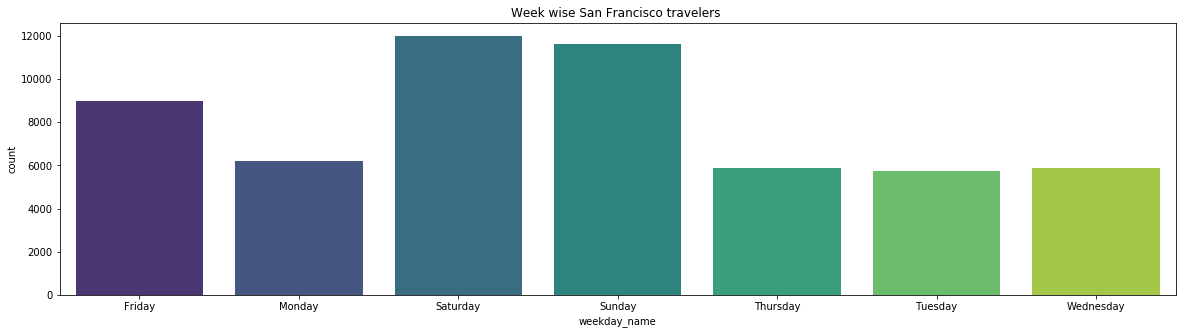

In [112]:

fig, ax = plt.subplots(figsize = (20,5))
sns.countplot(x = "weekday_name", data = df.query("label_name == 'San Francisco'"), palette = "viridis");
plt.title("Week wise San Francisco travelers ");

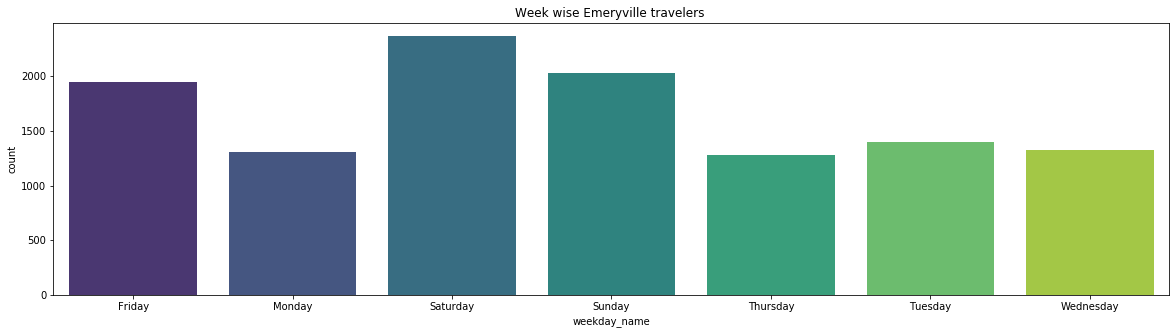

In [113]:

fig, ax = plt.subplots(figsize = (20,5))
sns.countplot(x = "weekday_name", data = df.query("label_name == 'Emeryville'"), palette = "viridis");
plt.title("Week wise Emeryville travelers ");

## Conclusion and Results 

* We can clealy see that rides from san jose travel longer than other two.
* We can clearly see from graph that most people have stated but not completed their ride 
* So from map plotting we can see that max number of people end riding bike is from somewhere far from milpitas , san francisco emeryville and berkeley
* So from map plotting we can see that max number of people start riding bike is from san jose , san francisco emeryville and berkeley.
* There are few outliers in label name
* The avgrage distance cover by san francisco is more than other two
* People used electric bike more for longer distance as compare to docked bike 
* From the obtained graph its clear that San francisco has the max distance covered troughout the week days .
* Amongst week days the max distance was on saturday
* From the above graph I can conclude that people traveled max distance on tuesday from san jose
* Most time taken by the rides from San Francisco
* We can clearly see that most number of registraion was  “Customer” that is Casual not “Subscriber” that is Member
* As expected most of the user that might have droped the rides are casual members 